# Logistic Regression of Telecom Dataset

## Import libraries and check out the data

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
df_customer = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [96]:
df_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [98]:
df_customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [99]:
df_customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Check for missing data

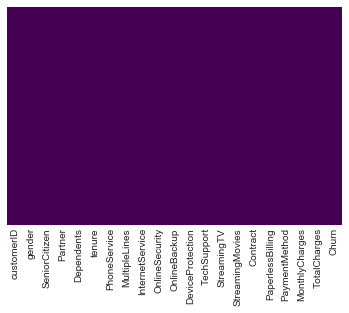

In [100]:
sns.heatmap(df_customer.isnull(),yticklabels=False,cbar=False,cmap='viridis')

** By looking at the heatmap, we conclude that we have all the data **

## Create plots to check out data and relation between variables

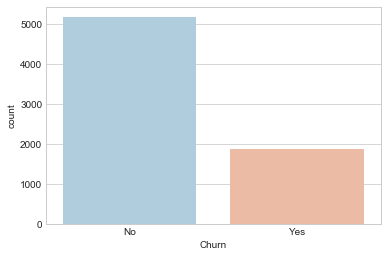

In [101]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',data=df_customer,palette='RdBu_r')

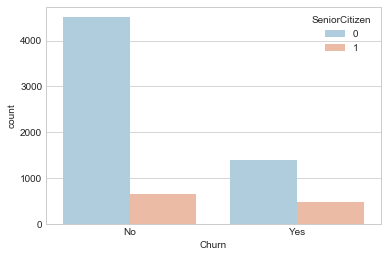

In [102]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='SeniorCitizen',data=df_customer,palette='RdBu_r')

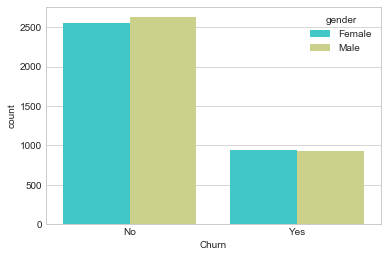

In [103]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='gender',data=df_customer,palette='rainbow')

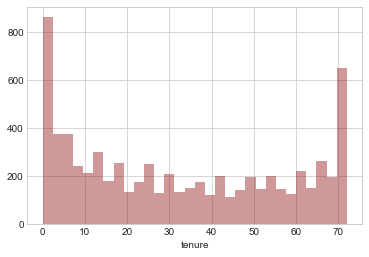

In [104]:
sns.distplot(df_customer['tenure'].dropna(),kde=False,color='darkred',bins=30)

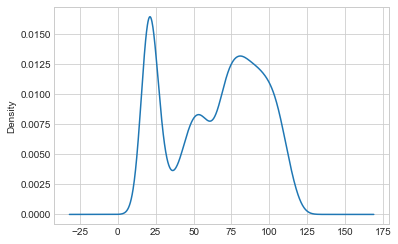

In [105]:
df_customer['MonthlyCharges'].plot.kde()

## Cleaning and Fixing the data

In [106]:
df_customer.replace('No'or'No*',0,inplace=True,regex=True)
df_customer.replace('Yes'or'Yes*',1,inplace=True,regex=True)
df_customer.replace('Female',0,inplace=True)
df_customer.replace('Male',1,inplace=True)

In [107]:
df_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


### Converting categorical variables to dummy variables

In [108]:
internet = pd.get_dummies(df_customer['InternetService'],drop_first=True)
contract = pd.get_dummies(df_customer['Contract'],drop_first=True)
payment = pd.get_dummies(df_customer['PaymentMethod'],drop_first=True)
df_customer.drop(['InternetService','Contract','PaymentMethod','customerID'],axis=1,inplace=True)

In [109]:
df_customer = pd.concat([df_customer,internet,contract,payment],axis=1)

In [110]:
df_customer=df_customer.convert_objects(convert_numeric=True)
df_customer.interpolate(inplace=True,axis=0,method='spline',order=1,limit=20,limit_direction='both')

C:\Users\mxg172130\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [111]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
gender                     7043 non-null int64
SeniorCitizen              7043 non-null int64
Partner                    7043 non-null int64
Dependents                 7043 non-null int64
tenure                     7043 non-null int64
PhoneService               7043 non-null int64
MultipleLines              7043 non-null int64
OnlineSecurity             7043 non-null int64
OnlineBackup               7043 non-null int64
DeviceProtection           7043 non-null int64
TechSupport                7043 non-null int64
StreamingTV                7043 non-null int64
StreamingMovies            7043 non-null int64
PaperlessBilling           7043 non-null int64
MonthlyCharges             7043 non-null float64
TotalCharges               7043 non-null float64
Churn                      7043 non-null int64
DSL                        7043 non-null uint8
Fiber optic                7043 non-null ui

In [112]:
df_customer.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,One year,Two year,Credit card (automatic),Electronic check,Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,64.761692,2283.517368,0.265370,0.343746,0.439585,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,30.090047,2266.077704,0.441561,0.474991,0.496372,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,35.500000,401.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,1398.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,89.850000,3793.050000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
df_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,One year,Two year,Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


## Build a Logistic Regression Model

** Split the data into training and testing sets **

## Train Test Split

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df_customer.drop('Churn',axis=1), 
                                                    df_customer['Churn'], test_size=0.30, 
                                                    random_state=101)

## Train the model and predict

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
predictions = logmodel.predict(X_test)

In [119]:
logmodel.coef_

array([[ 7.58985198e-03,  2.79061016e-01, -2.89582413e-02,
        -2.36082003e-01, -5.87872416e-02, -7.95237239e-01,
         1.26557415e-01, -3.53678836e-01, -2.17228357e-01,
        -1.07339458e-01, -4.43465249e-01,  1.85690337e-01,
         9.30668685e-02,  4.01803931e-01,  1.48485997e-02,
         2.24879435e-04, -4.19874979e-02,  3.89817174e-01,
        -3.47509949e-01, -5.74202289e-01, -2.55509971e-01,
         3.48012570e-01, -2.62791752e-01]])

## Evaluation of the Model

** Check precision, recall, f1-score using classification report **

In [120]:
from sklearn.metrics import classification_report

In [121]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.92      0.88      1546
          1       0.69      0.52      0.60       567

avg / total       0.80      0.81      0.80      2113



** After looking at the metrics, we conclude that the model is not bad **

### Confusion Matrix to describe performance of the model

In [122]:
from sklearn.metrics import confusion_matrix

In [123]:
cm=confusion_matrix(y_test,predictions)

In [124]:
cm

array([[1415,  131],
       [ 271,  296]], dtype=int64)

In [125]:
predacc=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
predacc

0.8097491717936584

### The prediction accuracy of the model is 0.8097

## End of Logistic Regression